In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten

In [1]:
import matplotlib.pyplot as plt
import random

#Load Dataset

In [4]:
x_train = np.loadtxt('input.csv',delimiter=',')
y_train = np.loadtxt('labels.csv',delimiter=',')

x_test = np.loadtxt('input_test.csv',delimiter=',')
y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [5]:
x_train =x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train), 1)

x_test =x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test), 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


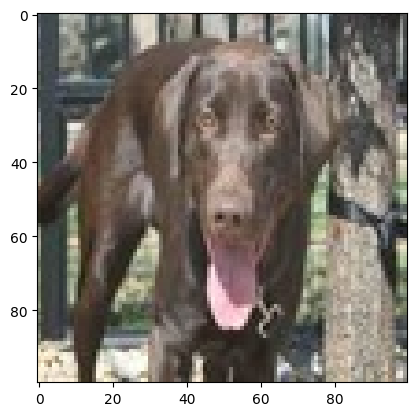

In [7]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

# Model

In [8]:
model = Sequential ([
    Convolution2D(32, (3,3), activation = 'relu' , input_shape =(100,100,3)),
    MaxPooling2D((2,2)),

    Convolution2D(32, (3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [10]:
model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs = 5, batch_size= 64)

Epoch 1/5
32/32 [==============================] - 69s 2s/step - loss: 0.3601 - accuracy: 0.8370
Epoch 2/5
32/32 [==============================] - 72s 2s/step - loss: 0.3018 - accuracy: 0.8755
Epoch 3/5
32/32 [==============================] - 100s 3s/step - loss: 0.2355 - accuracy: 0.9045
Epoch 4/5
32/32 [==============================] - 96s 3s/step - loss: 0.1805 - accuracy: 0.9340
Epoch 5/5
32/32 [==============================] - 64s 2s/step - loss: 0.1240 - accuracy: 0.9640


In [17]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 4s 308ms/step - loss: 0.8682 - accuracy: 0.6975


[0.8682144284248352, 0.6974999904632568]

 Making predictions

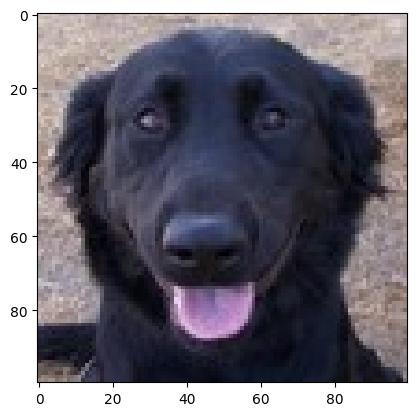

1/1 [==============================] - 0s 141ms/step
Our model says, It is a :  cat


In [40]:
idx2 = random.randint(0,len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says, It is a : ",pred)
